# Visualization of some Onnettomuudet Data

Collect information from the SQL database tables and analyse data is it contains some interesting features.

Visualization groups are next:
- A. Correlation Heatmap
- B. Accident development and their severity by years
- C. Ratio of severity to total accident by years
- D. More detailed analysis of feature combinations
     - Severity dependencies from Temperature, Involved group, Accident type and Accident class
     - Involved group depencies from Accident type and Accident class, Brightness and Winter care class

In [1]:
# Needed libraries
import pandas as pd
import numpy as np
import pyodbc
import sqlalchemy
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

In [2]:
# Needed Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Connection to SQL Server database

In [3]:
# Database
Database = 'Onnettomuudet'

#conn = 'DRIVER={ODBC Driver 17 for SQL Server};Server=localhost\SQLEXPRESS;Database=Onnettomuudet;Trusted_Connection=Yes;'
conn = 'DRIVER={ODBC Driver 17 for SQL Server};server=DESKTOP-Q88A49I\SQLEXPRESS;database=Onnettomuudet;trusted_connection=Yes;'
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": conn})
# Create engine between python and database
engine = create_engine(connection_url)

#### Read data from SQL Server database to dataframe

In [4]:
# Query of numeric data for correlation analysis
sqlcommand_1 = '''SELECT
    o.Onnett_id,
    o.Vuosi,
    Kk AS Kuukausi,
    Vkpv AS Viikonpäivä,
    Tunti,
    Vakavuusko AS Vakavuus,
    os.Kuollut AS Kuolleita,
    os.Loukk AS Loukkaantuneita,
    os.Oslaji AS Osallisen_laji,
    Onluokka AS Onnett_Luokka,
    Ontyyppi AS Onnett_Tyyppi,
    Onnpaikka AS Onnett_Paikka,
    Nopraj AS Nopeusrajoitus,
    t.Noplaji AS NopRaj_Laji,
    t.Risteys AS Risteävien_lkm,
    t.Talvhoitlk AS Talvihoitoluokka,
    t.Kvl AS Vrk_keskim_lm,
    t.Raskaskvl AS Vrk_keskim_raskas_lm,
    Pinta AS Tienpinta,
    Valoisuus,
    Sää,
    Lämpötila,
    a.Maakunta,
    Väestö,
    a.Kunta
FROM
    Onnettomuudet o
INNER JOIN Alueet a 
    ON o.alue_id = a.alue_id
INNER JOIN Tieomin t
    ON o.tieomin_id = t.tieomin_id AND
    o.Vuosi = t.Vuosi
LEFT JOIN Osalliset os
    ON o.Onnett_id = os.Onnett_id
INNER JOIN Väestö v
    ON o.Vuosi = v.Vuosi
WHERE
    a.Maakuntsel = v.Maakuntsel
GROUP BY 
    o.Onnett_id,
    o.Vuosi,
    Kk,
    Vkpv,
    Tunti,
    Vakavuusko,
    os.Kuollut,
    os.Loukk,
    os.Oslaji,
    Onluokka,
    Ontyyppi,
    Onnpaikka,
    Nopraj,
    t.Noplaji,
    t.Risteys,
    t.Talvhoitlk,
    t.Kvl,
    t.Raskaskvl,
    Pinta,
    Valoisuus,
    Sää,
    Lämpötila,
    a.Maakunta,
    Väestö,
    a.Kunta'''

In [5]:
# Query data for accident development and their severity
sqlcommand_2 = '''SELECT
    Vuosi,
    Maakuntsel,
    COUNT(Onnett_id) lkm_onnett, 
    SUM(Kuolleet) lkm_kuolleet,
    SUM(Loukkaant) lkm_loukkaant
FROM
    Onnettomuudet o
INNER JOIN Alueet a
        ON o.alue_id = a.alue_id
GROUP BY 
    Vuosi,
    Maakuntsel;'''

In [6]:
# Query data for ratio of severity to total accident
sqlcommand_3 = '''SELECT
    Vuosi,
    Onnett_id, 
    Vakavuus
FROM
    Onnettomuudet
GROUP BY 
    Vuosi,
    Onnett_id,
    Vakavuus;'''

In [7]:
# Query data for detailed analysis of feature combinations
sqlcommand_4 = '''SELECT
    o.Onnett_id,
    o.Vuosi,
    Kk AS Kuukausi,
    Vkpv AS Viikonpäivä,
    Tunti,
    Vakavuus,
    os.Oslajisel AS Osallisen_laji,
    os.Kuollut AS Kuolleita,
    os.Loukk AS Loukkaantuneita,
    Onlksel AS Onnett_Luokka,
    Ontyypsel AS Onnett_Tyyppi,
    Onnpaiksel AS Onnett_Paikka,
    Nopraj AS Nopeusrajoitus,
    t.Noplajisel AS NopRaj_Laji,
    t.Risteys AS Risteävien_lkm,
    t.Risteyssel AS Risteys_Laji,
    t.Talvhoitsel AS Talvihoitoluokka,
    t.Kvl AS Vrk_keskim_lm,
    t.Raskaskvl AS Vrk_keskim_raskas_lm,
    Pintasel AS Tienpinta,
    Valsel AS Valoisuus,
    Sääsel AS Sää,
    Lämpötila
FROM
    Onnettomuudet o
INNER JOIN Tieomin t
    ON o.tieomin_id = t.tieomin_id AND
    o.Vuosi = t.Vuosi
LEFT JOIN Osalliset os
    ON o.Onnett_id = os.Onnett_id
GROUP BY 
    o.Onnett_id,
    o.Vuosi,
    Kk,
    Vkpv,
    Tunti,
    Vakavuus,
    os.Oslajisel,
    os.Kuollut,
    os.Loukk,
    Onlksel,
    Ontyypsel,
    Onnpaiksel,
    Nopraj,
    t.Noplajisel,
    t.Risteys,
    t.Risteyssel,
    t.Talvhoitsel,
    t.Kvl,
    t.Raskaskvl,
    Pintasel,
    Valsel,
    Sääsel,
    Lämpötila;'''

In [8]:
query = pd.read_sql_query(sqlcommand_1,con=engine)
df_num = pd.DataFrame(query)

In [9]:
df_num

Onnett_id  Vuosi  Kuukausi Viikonpäivä  Tunti  Vakavuus  Kuolleita  \
0         6422405   2009         5    Lauantai   12.0         0        NaN   
1         6422406   2011         4     Torstai   15.0         0        0.0   
2         6422407   2010         8     Torstai    2.0         0        0.0   
3         6422408   2010        11   Perjantai    8.0         0        0.0   
4         6422409   2011        12    Lauantai   14.0         0        NaN   
...           ...    ...       ...         ...    ...       ...        ...   
550421   10211231   2021        11     Tiistai   11.0         0        0.0   
550422   10211232   2021        11     Tiistai   16.0         2        0.0   
550423   10211232   2021        11     Tiistai   16.0         2        0.0   
550424   10211233   2021        11     Tiistai   17.0         0        0.0   
550425   10211237   2020        12    Lauantai   12.0         0        0.0   

        Loukkaantuneita  Osallisen_laji  Onnett_Luokka  ...  Talvihoitoluokka  \
0                   NaN             NaN             13  ...               NaN   
1                   0.0            30.0              1  ...               NaN   
2                   0.0            30.0              1  ...               NaN   
3                   0.0            30.0              1  ...               NaN   
4                   NaN             NaN             13  ...               NaN   
...                 ...             ...            ...  ...               ...   
550421              0.0            32.0              2  ...               NaN   
550422              1.0            30.0              6  ...               NaN   
550423              4.0            30.0              6  ...               NaN   
550424              0.0            30.0              2  ...               NaN   
550425              0.0            30.0              1  ...               2.0   

        Vrk_keskim_lm  Vrk_keskim_raskas_lm  Tienpinta  Valoisuus  Sää  \
0                 NaN                   NaN        1.0        1.0  1.0   
1                 NaN                   NaN        2.0        1.0  4.0   
2                 NaN                   NaN        1.0        4.0  NaN   
3                 NaN                   NaN        4.0        NaN  NaN   
4                 NaN                   NaN        NaN        NaN  NaN   
...               ...                   ...        ...        ...  ...   
550421            NaN                   NaN        4.0        1.0  1.0   
550422            NaN                   NaN        4.0        3.0  2.0   
550423            NaN                   NaN        4.0        3.0  2.0   
550424            NaN                   NaN        6.0        4.0  5.0   
550425         2735.0                 335.0        7.0        1.0  2.0   

        Lämpötila  Maakunta  Väestö  Kunta  
0             NaN        14  198502    934  
1             NaN        13  271083    312  
2             NaN        19  183748    240  
3             NaN        19  183748    240  
4             NaN        13  271083    312  
...           ...       ...     ...    ...  
550421      -15.0         7  205771    398  
550422       -5.0         7  205771    398  
550423       -5.0         7  205771    398  
550424       -4.0         7  205771    398  
550425       -4.0        13  272898    249  

[550426 rows x 25 columns]

In [10]:
# Replace 'Viikonpäivä' with numeric value (also empty values NaN to nullable int)
df_num['Viikonpäivä'] = df_num['Viikonpäivä'].replace(
                        ['Maanantai','Tiistai','Keskiviikko','Torstai','Perjantai','Lauantai','Sunnuntai','Ei arvoa'],
                        [1,2,3,4,5,6,7,''])
df_num['Viikonpäivä'] = pd.to_numeric(df_num['Viikonpäivä'], errors='coerce').convert_dtypes()

In [11]:
df_num

Onnett_id  Vuosi  Kuukausi  Viikonpäivä  Tunti  Vakavuus  Kuolleita  \
0         6422405   2009         5            6   12.0         0        NaN   
1         6422406   2011         4            4   15.0         0        0.0   
2         6422407   2010         8            4    2.0         0        0.0   
3         6422408   2010        11            5    8.0         0        0.0   
4         6422409   2011        12            6   14.0         0        NaN   
...           ...    ...       ...          ...    ...       ...        ...   
550421   10211231   2021        11            2   11.0         0        0.0   
550422   10211232   2021        11            2   16.0         2        0.0   
550423   10211232   2021        11            2   16.0         2        0.0   
550424   10211233   2021        11            2   17.0         0        0.0   
550425   10211237   2020        12            6   12.0         0        0.0   

        Loukkaantuneita  Osallisen_laji  Onnett_Luokka  ...  Talvihoitoluokka  \
0                   NaN             NaN             13  ...               NaN   
1                   0.0            30.0              1  ...               NaN   
2                   0.0            30.0              1  ...               NaN   
3                   0.0            30.0              1  ...               NaN   
4                   NaN             NaN             13  ...               NaN   
...                 ...             ...            ...  ...               ...   
550421              0.0            32.0              2  ...               NaN   
550422              1.0            30.0              6  ...               NaN   
550423              4.0            30.0              6  ...               NaN   
550424              0.0            30.0              2  ...               NaN   
550425              0.0            30.0              1  ...               2.0   

        Vrk_keskim_lm  Vrk_keskim_raskas_lm  Tienpinta  Valoisuus  Sää  \
0                 NaN                   NaN        1.0        1.0  1.0   
1                 NaN                   NaN        2.0        1.0  4.0   
2                 NaN                   NaN        1.0        4.0  NaN   
3                 NaN                   NaN        4.0        NaN  NaN   
4                 NaN                   NaN        NaN        NaN  NaN   
...               ...                   ...        ...        ...  ...   
550421            NaN                   NaN        4.0        1.0  1.0   
550422            NaN                   NaN        4.0        3.0  2.0   
550423            NaN                   NaN        4.0        3.0  2.0   
550424            NaN                   NaN        6.0        4.0  5.0   
550425         2735.0                 335.0        7.0        1.0  2.0   

        Lämpötila  Maakunta  Väestö  Kunta  
0             NaN        14  198502    934  
1             NaN        13  271083    312  
2             NaN        19  183748    240  
3             NaN        19  183748    240  
4             NaN        13  271083    312  
...           ...       ...     ...    ...  
550421      -15.0         7  205771    398  
550422       -5.0         7  205771    398  
550423       -5.0         7  205771    398  
550424       -4.0         7  205771    398  
550425       -4.0        13  272898    249  

[550426 rows x 25 columns]

### A. Visualize Correlation Heatmap

In [12]:
# Drop columns whose value appears in another column 'Vakavuus'
df_heat = df_num.drop(['Onnett_id','Kuolleita','Loukkaantuneita'], axis=1)

In [13]:
df_heat.corr()

Vuosi  Kuukausi  Viikonpäivä     Tunti  Vakavuus  \
Vuosi                 1.000000 -0.039199    -0.013615  0.008686  0.075596   
Kuukausi             -0.039199  1.000000     0.012668  0.024962  0.003047   
Viikonpäivä          -0.013615  0.012668     1.000000  0.009448 -0.007180   
Tunti                 0.008686  0.024962     0.009448  1.000000  0.015428   
Vakavuus              0.075596  0.003047    -0.007180  0.015428  1.000000   
Osallisen_laji       -0.077686  0.075023     0.030970  0.000819 -0.276099   
Onnett_Luokka         0.000599  0.092014    -0.007161  0.038334 -0.149990   
Onnett_Tyyppi        -0.058975  0.089375     0.084997 -0.028952 -0.195091   
Onnett_Paikka         0.057868 -0.017617    -0.019201  0.001522  0.032009   
Nopeusrajoitus       -0.160898  0.068954     0.057280 -0.015206 -0.108954   
NopRaj_Laji          -0.078862  0.038950     0.027636 -0.005498 -0.024808   
Risteävien_lkm        0.064263 -0.019632    -0.015912  0.004779  0.016894   
Talvihoitoluokka     -0.017148  0.009740     0.016555  0.005055  0.034628   
Vrk_keskim_lm         0.054922 -0.032332    -0.033709 -0.018662 -0.004558   
Vrk_keskim_raskas_lm  0.021048 -0.027863    -0.028091 -0.020605 -0.012574   
Tienpinta            -0.035949 -0.211020    -0.008515 -0.028843 -0.072922   
Valoisuus            -0.013597  0.141321     0.076354  0.117446 -0.092023   
Sää                  -0.012908  0.051981     0.000624  0.001975 -0.046404   
Lämpötila             0.048333  0.176458     0.006231  0.061298  0.126792   
Maakunta             -0.010063 -0.026769     0.008881  0.008919  0.009739   
Väestö                0.037162  0.020758    -0.010299 -0.008366  0.003027   
Kunta                -0.029246  0.021525     0.004479  0.003908 -0.016245   

                      Osallisen_laji  Onnett_Luokka  Onnett_Tyyppi  \
Vuosi                      -0.077686       0.000599      -0.058975   
Kuukausi                    0.075023       0.092014       0.089375   
Viikonpäivä                 0.030970      -0.007161       0.084997   
Tunti                       0.000819       0.038334      -0.028952   
Vakavuus                   -0.276099      -0.149990      -0.195091   
Osallisen_laji              1.000000       0.303091       0.324605   
Onnett_Luokka               0.303091       1.000000       0.415548   
Onnett_Tyyppi               0.324605       0.415548       1.000000   
Onnett_Paikka              -0.133030       0.054715       0.008299   
Nopeusrajoitus              0.345847       0.090340       0.260925   
NopRaj_Laji                 0.159414      -0.031904       0.110293   
Risteävien_lkm             -0.099034      -0.002840      -0.061264   
Talvihoitoluokka           -0.015325      -0.028747       0.118169   
Vrk_keskim_lm              -0.060008      -0.053645      -0.205120   
Vrk_keskim_raskas_lm       -0.039195      -0.033203      -0.175155   
Tienpinta                  -0.003163      -0.128477      -0.013269   
Valoisuus                   0.146164       0.072269       0.182467   
Sää                         0.031434      -0.038206       0.018031   
Lämpötila                  -0.069749       0.043025      -0.041537   
Maakunta                   -0.029600      -0.037438      -0.016755   
Väestö                      0.013592       0.007934      -0.027795   
Kunta                       0.053708       0.031901       0.055181   

                      Onnett_Paikka  Nopeusrajoitus  ...  Talvihoitoluokka  \
Vuosi                      0.057868       -0.160898  ...         -0.017148   
Kuukausi                  -0.017617        0.068954  ...          0.009740   
Viikonpäivä               -0.019201        0.057280  ...          0.016555   
Tunti                      0.001522       -0.015206  ...          0.005055   
Vakavuus                   0.032009       -0.108954  ...          0.034628   
Osallisen_laji            -0.133030        0.345847  ...         -0.015325   
Onnett_Luokka              0.054715        0.090340  ...         -0.028747   
Onnett_Tyyppi     

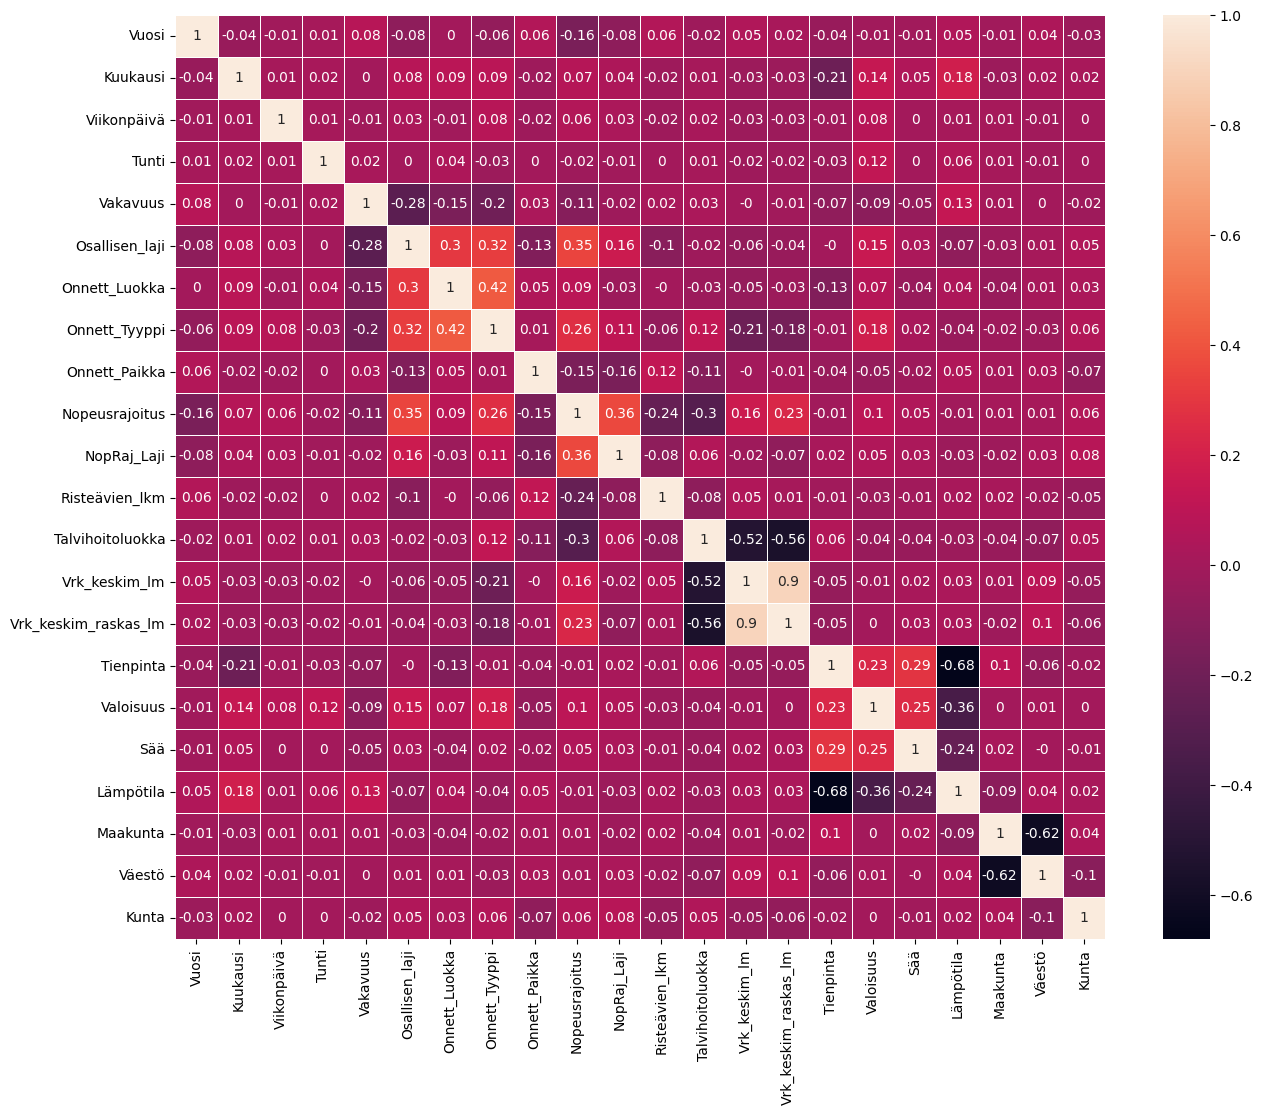

In [14]:
fig,ax = plt.subplots(figsize=(15,12))
data = df_heat.corr().round(2)
ax = sns.heatmap(data, linewidth=0.5, annot=True)
plt.show()

#### Analysing

Some dependecies between:
- Vakavuus with Lämpötila, Osallisen laji, Onnettomuustyyppi and -luokka
- Osallisen laji with Onnettomuustyyppi and -luokka, Valoisuus, Talvihoitoluokka/Nopeusrajoitus
- Onnettomuusluokka with Sää, Tienpinta
- Onnettomuustyyppi with Valoisuus, Talvihoitoluokka/Nopeusrajoitus (last two appears to be dependent each other) and Vuorokauden keskimääräiset liikennemäärät

Although there are no clear features that affect Vakavuus (severity), these feature combinations can be visualized in more details.

### B. Visualize accident development and their severity by years

In [15]:
query = pd.read_sql_query(sqlcommand_2,con=engine)
df_acc = pd.DataFrame(query)

In [16]:
df_acc

Vuosi       Maakuntsel  lkm_onnett  lkm_kuolleet  lkm_loukkaant
0     2010           Kainuu         946             5            186
1     2013    Etelä-Karjala         675            13            184
2     2007        Pirkanmaa        1145            20            287
3     2006      Kymenlaakso         347            11            108
4     2020      Kymenlaakso          63             0             27
..     ...              ...         ...           ...            ...
304   2019        Pohjanmaa         328             4             69
305   2011  Varsinais-Suomi        3299            31            692
306   2008        Satakunta        1068             6            256
307   2014      Keski-Suomi         587            13            173
308   2014      Kymenlaakso         133             0             46

[309 rows x 5 columns]

In [17]:
df_onn = df_acc.loc[:,['Vuosi','lkm_onnett','lkm_kuolleet','lkm_loukkaant']]
df_onn = df_onn.groupby('Vuosi').sum()

In [18]:
df_onn

lkm_onnett  lkm_kuolleet  lkm_loukkaant
Vuosi                                         
2005        16598           289           4252
2006        16645           251           4574
2007        16903           286           4960
2008        17266           224           4572
2009        30961           270           7635
2010        33814           272           7645
2011        33203           291           7899
2012        32812           254           7046
2013        29719           254           6625
2014        28345           226           6631
2015        25175           265           6328
2016        19991           251           5828
2017        17350           219           5530
2018        16220           238           5245
2019        15297           210           4955
2020        11347           223           4348
2021         9567           203           3523

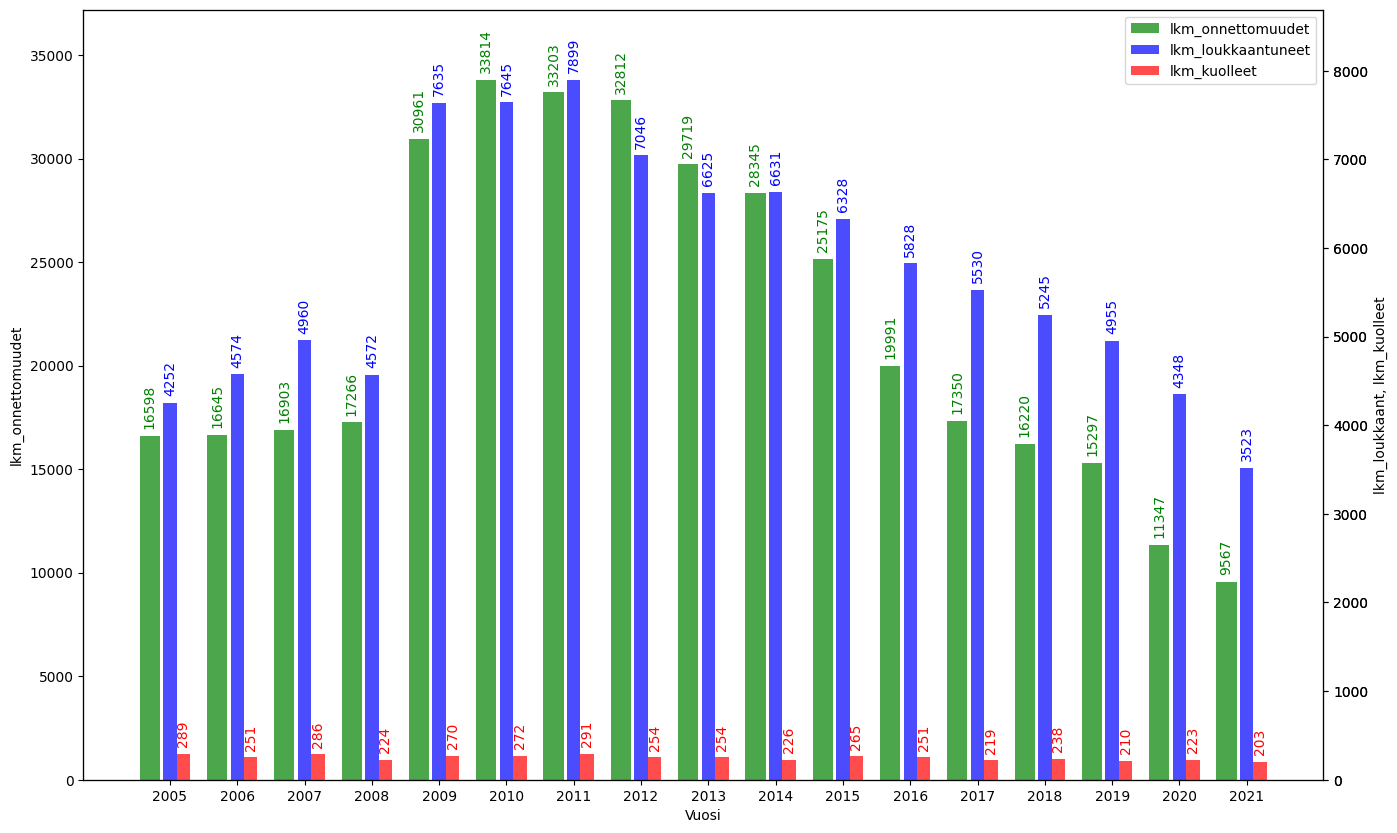

In [19]:
fig,ax = plt.subplots(figsize=(16,10))
labels = df_onn.index.tolist()

x = np.arange(len(labels))
ax2 = ax.twinx()
ax3 = ax.twinx()
width = 0.2

b1 = ax.bar(x-1.5*width,df_onn['lkm_onnett'], width=1.5*width, color='green', label='lkm_onnettomuudet', alpha=0.7)
b2 = ax2.bar(x, df_onn['lkm_loukkaant'], width=width, color='blue', label='lkm_loukkaantuneet', alpha=0.7)
b3 = ax3.bar(x+width, df_onn['lkm_kuolleet'], width=width, color='red', label='lkm_kuolleet', alpha=0.7)

lgns = [b1,b2,b3]
ax.legend(handles=lgns, loc='best')
for bars in ax.containers:
    ax.bar_label(bars, color='green', padding=5, rotation=90)
for bars in ax2.containers:
    ax2.bar_label(bars, color='blue', padding=5, rotation=90)
for bars in ax3.containers:
    ax3.bar_label(bars, color='red', padding=5, rotation=90)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Vuosi')
ax.set_ylabel('lkm_onnettomuudet')
ax2.set_ylabel('lkm_loukkaant, lkm_kuolleet')
ax.set_ylim(0,1.1*df_onn['lkm_onnett'].max())
ax2.set_ylim(0,1.1*df_onn['lkm_loukkaant'].max())
ax3.set_ylim(0,1.1*df_onn['lkm_loukkaant'].max())
ax2.grid(False)
plt.show()

#### Analysing

The number of accidents seems to have increased significantly since 2009. It is difficult to explain a clear reason, but it is likely that there has been a change in data collection or statistics. The severity of accidents in relation to the total number follows the changes.

### C. Visualize ratio of severity to total accident by years

In [20]:
query = pd.read_sql_query(sqlcommand_3,con=engine)
df_ptg = pd.DataFrame(query)

In [21]:
df_ptg

Vuosi  Onnett_id                   Vakavuus
0        2009    6422405        Ei henkilövahinkoja
1        2011    6422406        Ei henkilövahinkoja
2        2010    6422407        Ei henkilövahinkoja
3        2010    6422408        Ei henkilövahinkoja
4        2011    6422409        Ei henkilövahinkoja
...       ...        ...                        ...
371208   2021   10211230  Loukkaantumiseen johtanut
371209   2021   10211231        Ei henkilövahinkoja
371210   2021   10211232  Loukkaantumiseen johtanut
371211   2021   10211233        Ei henkilövahinkoja
371212   2020   10211237        Ei henkilövahinkoja

[371213 rows x 3 columns]

In [22]:
df_ptg = pd.get_dummies(df_ptg,columns=['Vakavuus'])

In [23]:
#df_ptg

In [24]:
df_ptg = df_ptg.groupby('Vuosi').sum()

In [25]:
#df_ptg

In [26]:
df_ptg.rename(columns = {'Vakavuus_Ei henkilövahinkoja':'Ei_vah',
                         'Vakavuus_Kuolemaan johtanut':'Kuol',
                         'Vakavuus_Loukkaantumiseen johtanut':'Loukk'}, inplace = True)
df_ptg['Total'] = df_ptg.apply(lambda row: row.Ei_vah + row.Kuol + row.Loukk, axis=1)
df_ptg = df_ptg.drop(['Onnett_id'], axis=1)

In [27]:
df_ptg.reset_index(inplace = True, drop = False)

In [28]:
#df_ptg

In [29]:
ptg_ei_vah = []
for i in range(df_ptg.shape[0]):
    pct = (df_ptg.Ei_vah[i] / df_ptg.Total[i]) * 100
    ptg_ei_vah.append(round(pct,2))
df_ptg['ptg_ei_vah'] = ptg_ei_vah

ptg_loukk = []
for i in range(df_ptg.shape[0]):
    pct = (df_ptg.Loukk[i] / df_ptg.Total[i]) * 100
    ptg_loukk.append(round(pct,2))
df_ptg['ptg_loukk'] = ptg_loukk

ptg_kuol = []
for i in range(df_ptg.shape[0]):
    pct = (df_ptg.Kuol[i] / df_ptg.Total[i]) * 100
    ptg_kuol.append(round(pct,2))
df_ptg['ptg_kuol'] = ptg_kuol

In [30]:
#df_ptg

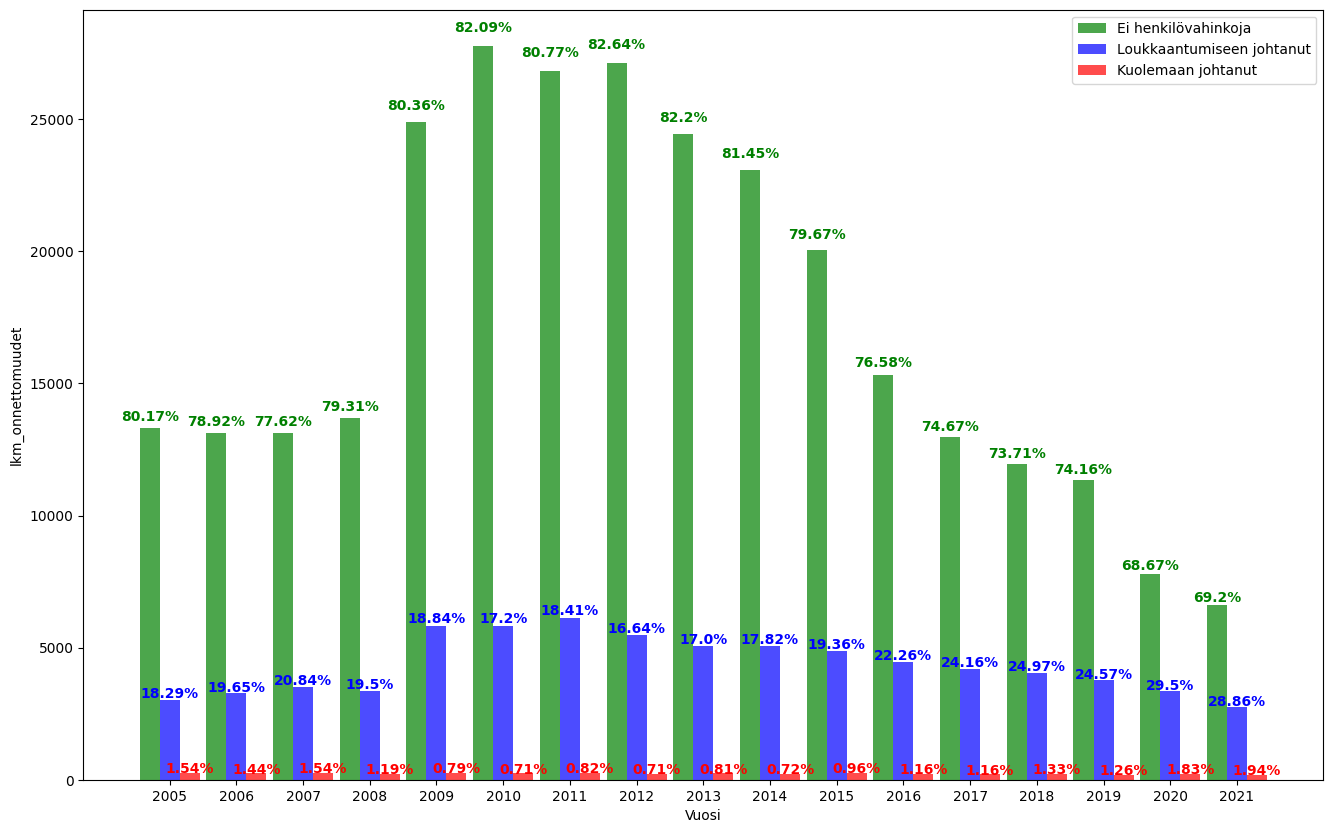

In [31]:
 # depict illustration
fig,ax = plt.subplots(figsize=(16,10))
labels = df_ptg.Vuosi.tolist()

x = np.arange(len(labels))
width = 0.3

b1 = ax.bar(x-width,df_ptg.Ei_vah, width=width, color='green', label='Ei henkilövahinkoja', alpha=0.7)
b2 = ax.bar(x,df_ptg.Loukk, width=width, color='blue', label='Loukkaantumiseen johtanut', alpha=0.7)
b3 = ax.bar(x+width,df_ptg.Kuol, width=width, color='red', label='Kuolemaan johtanut', alpha=0.7)

lgns = [b1,b2,b3]
ax.legend(handles=lgns, loc='best')

i = 0
for p in b1:
    w1 = p.get_width()
    h1 = p.get_height()
    x1, y1 = p.get_xy()
    plt.text(x1+w1/2, y1+h1*1.02, str(df_ptg.ptg_ei_vah[i])+'%', ha='center', color='green', weight='bold')
    i+=1
j = 0
for q in b2:
    w2 = q.get_width()
    h2 = q.get_height()
    x2, y2 = q.get_xy()
    plt.text(x2+w2/2, y2+h2*1.02, str(df_ptg.ptg_loukk[j])+'%', ha='center', color='blue', weight='bold')
    j+=1
k = 0
for r in b3:
    w3 = r.get_width()
    h3 = r.get_height()
    x3, y3 = r.get_xy()
    plt.text(x3+w3/2, y3+h3*1.02, str(df_ptg.ptg_kuol[k])+'%', ha='center', color='red', weight='bold')
    k+=1
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Vuosi')
ax.set_ylabel('lkm_onnettomuudet')
plt.show()

#### Analysing

It was already stated above that the severity of accidents in relation to the total number follows changes. But it is significant that as the total number decreases, the number of serious damages increases proportionally.

In other words, there have been fewer accidents in recent years, but the proportion of more serious ones has not decreased proportionally. The good thing is that the number of more serious damages has also decreased.

### D. Visualize more detailed analysis of feature combinations

1. Vakavuus with Lämpötila, Osallisen laji, Onnettomuustyyppi and -luokka
2. Osallisen laji with Onnettomuustyyppi and -luokka, Valoisuus, Talvihoitoluokka/Nopeusrajoitus
3. Onnettomuusluokka with Sää, Tienpinta
4. Onnettomuustyyppi with Valoisuus, Talvihoitoluokka/Nopeusrajoitus and Vuorokauden keskimääräiset liikennemäärät

In [32]:
query = pd.read_sql_query(sqlcommand_4,con=engine)
df_det = pd.DataFrame(query)

In [33]:
df_det

Onnett_id  Vuosi  Kuukausi Viikonpäivä  Tunti  \
0         6422405   2009         5    Lauantai   12.0   
1         6422406   2011         4     Torstai   15.0   
2         6422407   2010         8     Torstai    2.0   
3         6422408   2010        11   Perjantai    8.0   
4         6422409   2011        12    Lauantai   14.0   
...           ...    ...       ...         ...    ...   
550421   10211231   2021        11     Tiistai   11.0   
550422   10211232   2021        11     Tiistai   16.0   
550423   10211232   2021        11     Tiistai   16.0   
550424   10211233   2021        11     Tiistai   17.0   
550425   10211237   2020        12    Lauantai   12.0   

                         Vakavuus Osallisen_laji  Kuolleita  Loukkaantuneita  \
0             Ei henkilövahinkoja           None        NaN              NaN   
1             Ei henkilövahinkoja    henkilöauto        0.0              0.0   
2             Ei henkilövahinkoja    henkilöauto        0.0              0.0   
3             Ei henkilövahinkoja    henkilöauto        0.0              0.0   
4             Ei henkilövahinkoja           None        NaN              NaN   
...                           ...            ...        ...              ...   
550421        Ei henkilövahinkoja    kuorma-auto        0.0              0.0   
550422  Loukkaantumiseen johtanut    henkilöauto        0.0              1.0   
550423  Loukkaantumiseen johtanut    henkilöauto        0.0              4.0   
550424        Ei henkilövahinkoja    henkilöauto        0.0              0.0   
550425        Ei henkilövahinkoja    henkilöauto        0.0              0.0   

                Onnett_Luokka  ...            NopRaj_Laji Risteävien_lkm  \
0             muu onnettomuus  ...               Ei arvoa              0   
1        yksittäisonnettomuus  ...               Ei arvoa              0   
2        yksittäisonnettomuus  ...               Ei arvoa              0   
3        yksittäisonnettomuus  ...               Ei arvoa              1   
4             muu onnettomuus  ...               Ei arvoa              0   
...                       ...  ...                    ...            ...   
550421   kääntymisonnettomuus  ...               Ei arvoa              0   
550422  peräänajo-onnettomuus  ...               Ei arvoa              0   
550423  peräänajo-onnettomuus  ...               Ei arvoa              0   
550424   kääntymisonnettomuus  ...               Ei arvoa              0   
550425   yksittäisonnettomuus  ...  tiekohtainen rajoitus              0   

            Risteys_Laji           Talvihoitoluokka  Vrk_keskim_lm  \
0       linjaonnettomuus                   Ei arvoa            NaN   
1       linjaonnettomuus                   Ei arvoa            NaN   
2       linjaonnettomuus                   Ei arvoa            NaN   
3              tasa-arvo                   Ei arvoa            NaN   
4       linjaonnettomuus                   Ei arvoa            NaN   
...                  ...                        ...            ...   
550421  linjaonnettomuus                   Ei arvoa            NaN   
550422  linjaonnettomuus                   Ei arvoa            NaN   
550423  linjaonnettomuus                   Ei arvoa            NaN   
550424  linjaonnettomuus                   Ei arvoa            NaN   
550425  linjaonnettomuus  normaalisti aina paljaana         2735.0   

       Vrk_keskim_raskas_lm        Tienpinta             Valoisuus  \
0                       NaN    paljas, kuiva            päivänvalo   
1                       NaN    paljas, märkä            päivänvalo   
2                       NaN    paljas, kuiva          tie valaistu   
3                       NaN          luminen              Ei arvoa   
4                       NaN         Ei arvoa              Ei arvoa   
...                     ...              ...                   ...   
550421                  NaN          luminen            päivänvalo   
550422                  NaN          luminen  pi

#### D.1. Vakavuus depencies from Lämpötila deviation

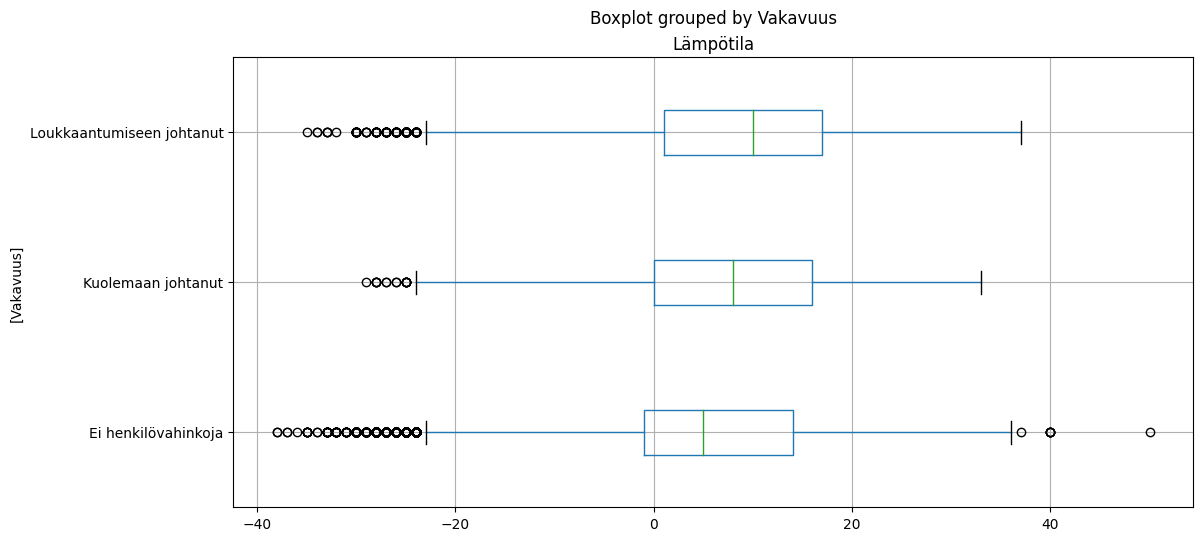

In [34]:
df_box = df_det[['Vakavuus','Lämpötila']].copy()

df_box.boxplot(by = 'Vakavuus', vert = False, figsize=(12,6))

plt.show()

#### Analysing

#### D.1. Vakavuus depencies from Osallisen laji

In [35]:
df_map = df_det[['Vakavuus','Osallisen_laji','Onnett_Luokka','Onnett_Tyyppi']].copy()
#df_map

In [36]:
df_map1 = df_map[df_map['Vakavuus'] == 'Ei henkilövahinkoja']
df_map2 = df_map[df_map['Vakavuus'] == 'Loukkaantumiseen johtanut']
df_map3 = df_map[df_map['Vakavuus'] == 'Kuolemaan johtanut']

C:\Users\pasih\AppData\Local\Temp\ipykernel_10440\393801278.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


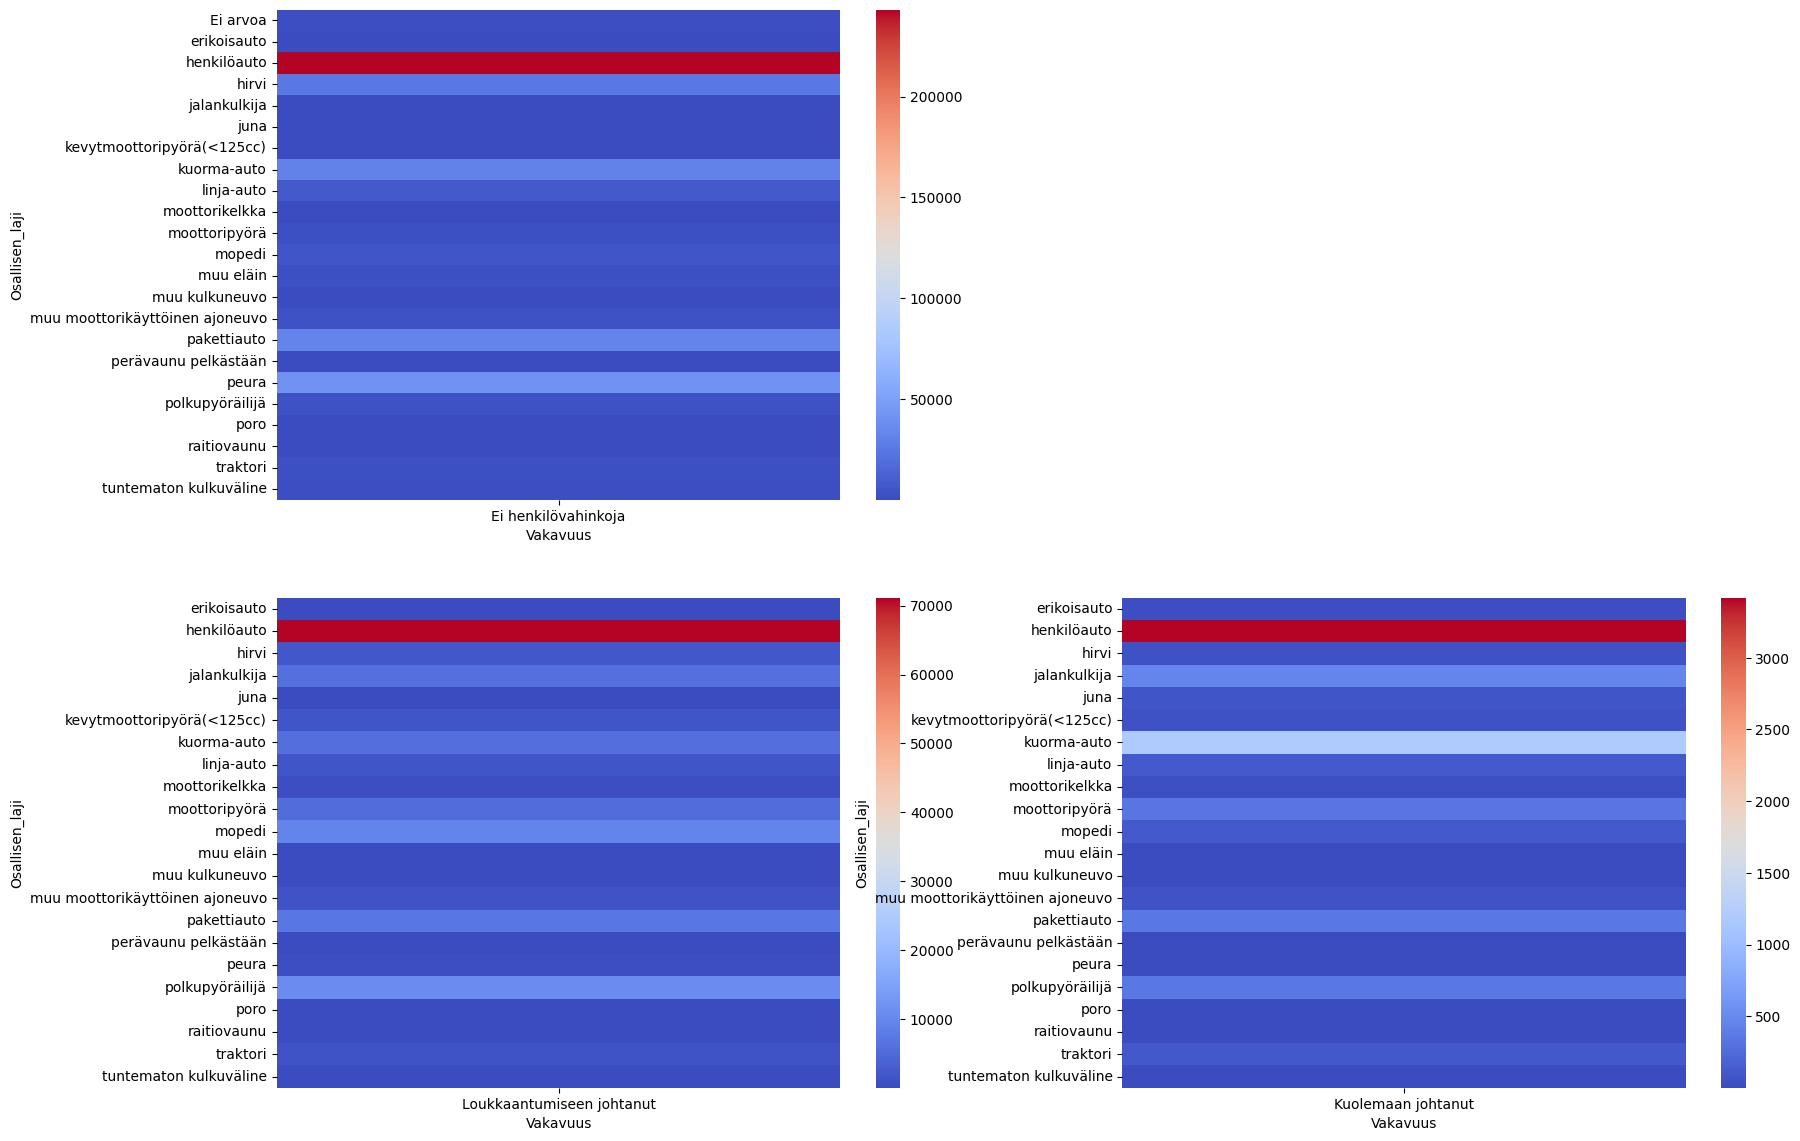

In [37]:
fig, ax = plt.subplots(figsize=(20,14))
plt.subplot(2,2,1)
ax=sns.heatmap(pd.crosstab(df_map1.Osallisen_laji, df_map1.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(2,2,3)
ax=sns.heatmap(pd.crosstab(df_map2.Osallisen_laji, df_map2.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(2,2,4)
ax=sns.heatmap(pd.crosstab(df_map3.Osallisen_laji, df_map3.Vakavuus), annot=False, cmap="coolwarm")

plt.show()

#### Analysing

#### D.1. Vakavuus depencies from Onnettomuusluokka

C:\Users\pasih\AppData\Local\Temp\ipykernel_10440\832737433.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


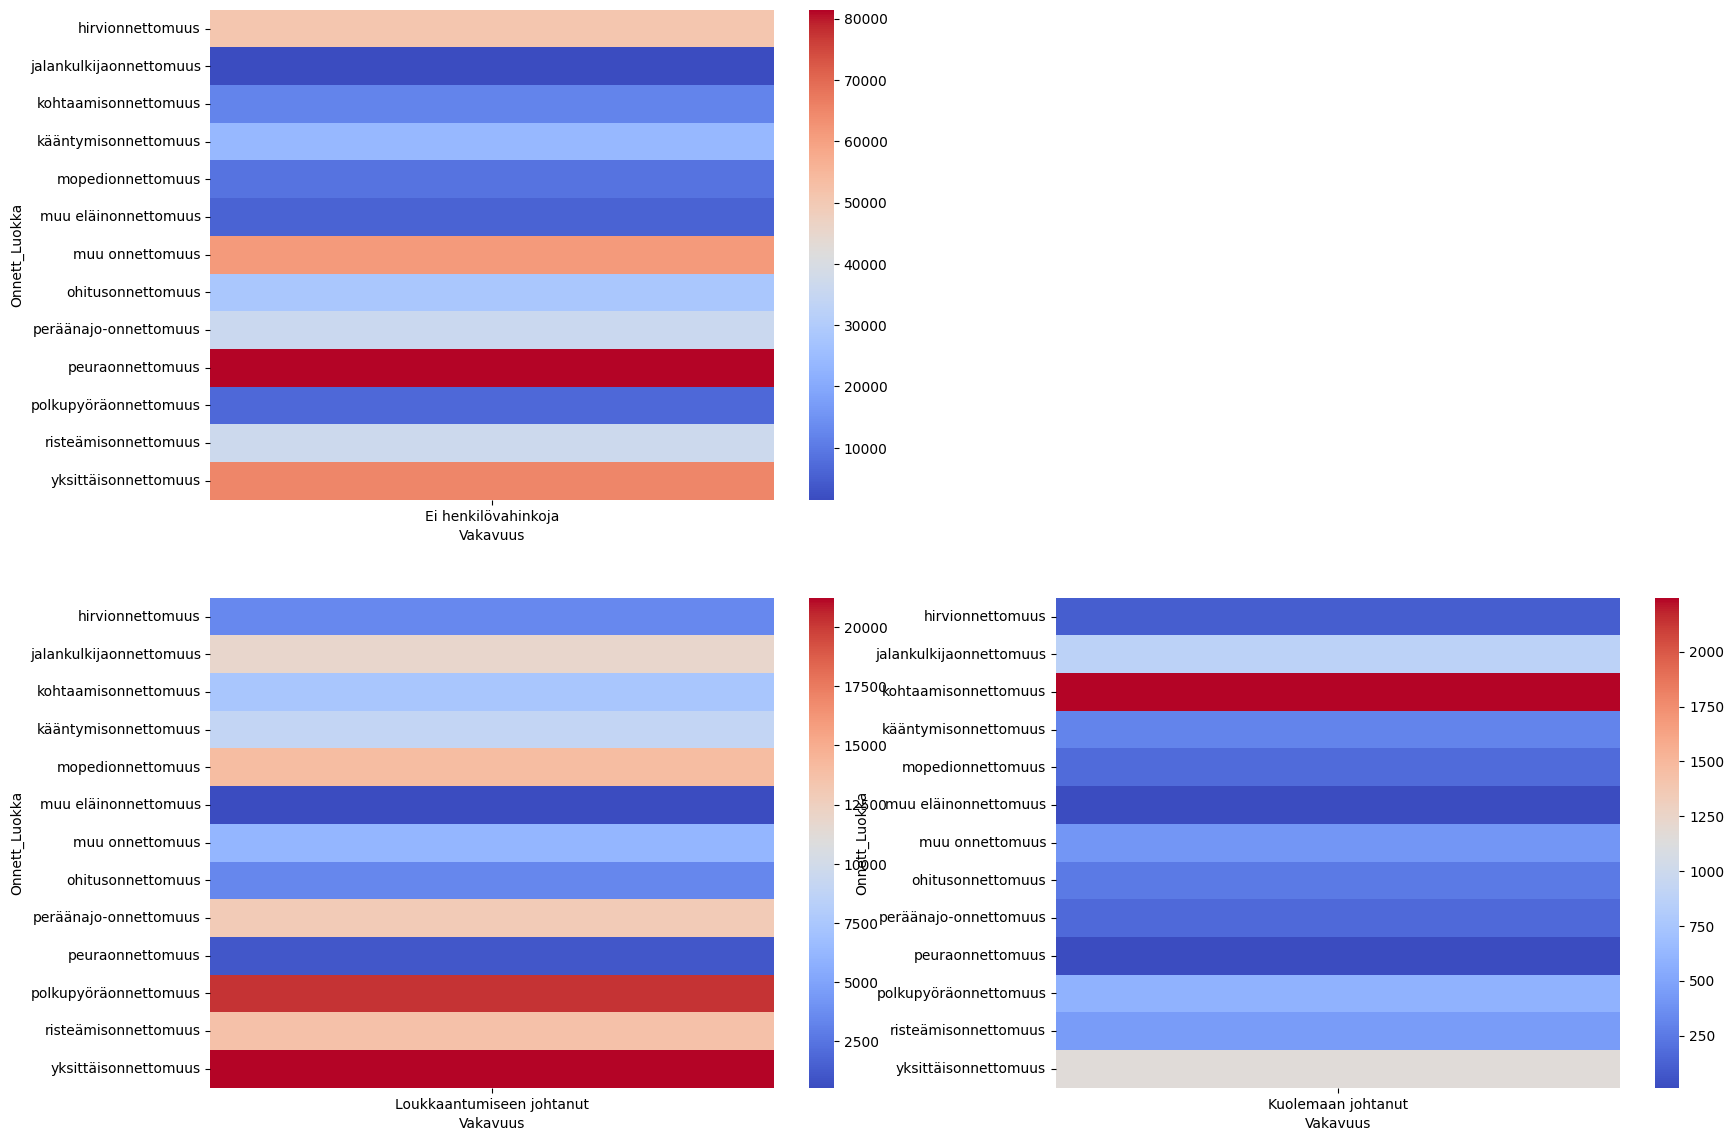

In [38]:
fig, ax = plt.subplots(figsize=(20,14))
plt.subplot(2,2,1)
ax=sns.heatmap(pd.crosstab(df_map1.Onnett_Luokka, df_map1.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(2,2,3)
ax=sns.heatmap(pd.crosstab(df_map2.Onnett_Luokka, df_map2.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(2,2,4)
ax=sns.heatmap(pd.crosstab(df_map3.Onnett_Luokka, df_map3.Vakavuus), annot=False, cmap="coolwarm")

plt.show()

#### Analysing

#### D.1. Vakavuus depencies from Onnettomuustyyppi

C:\Users\pasih\AppData\Local\Temp\ipykernel_10440\2446940722.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


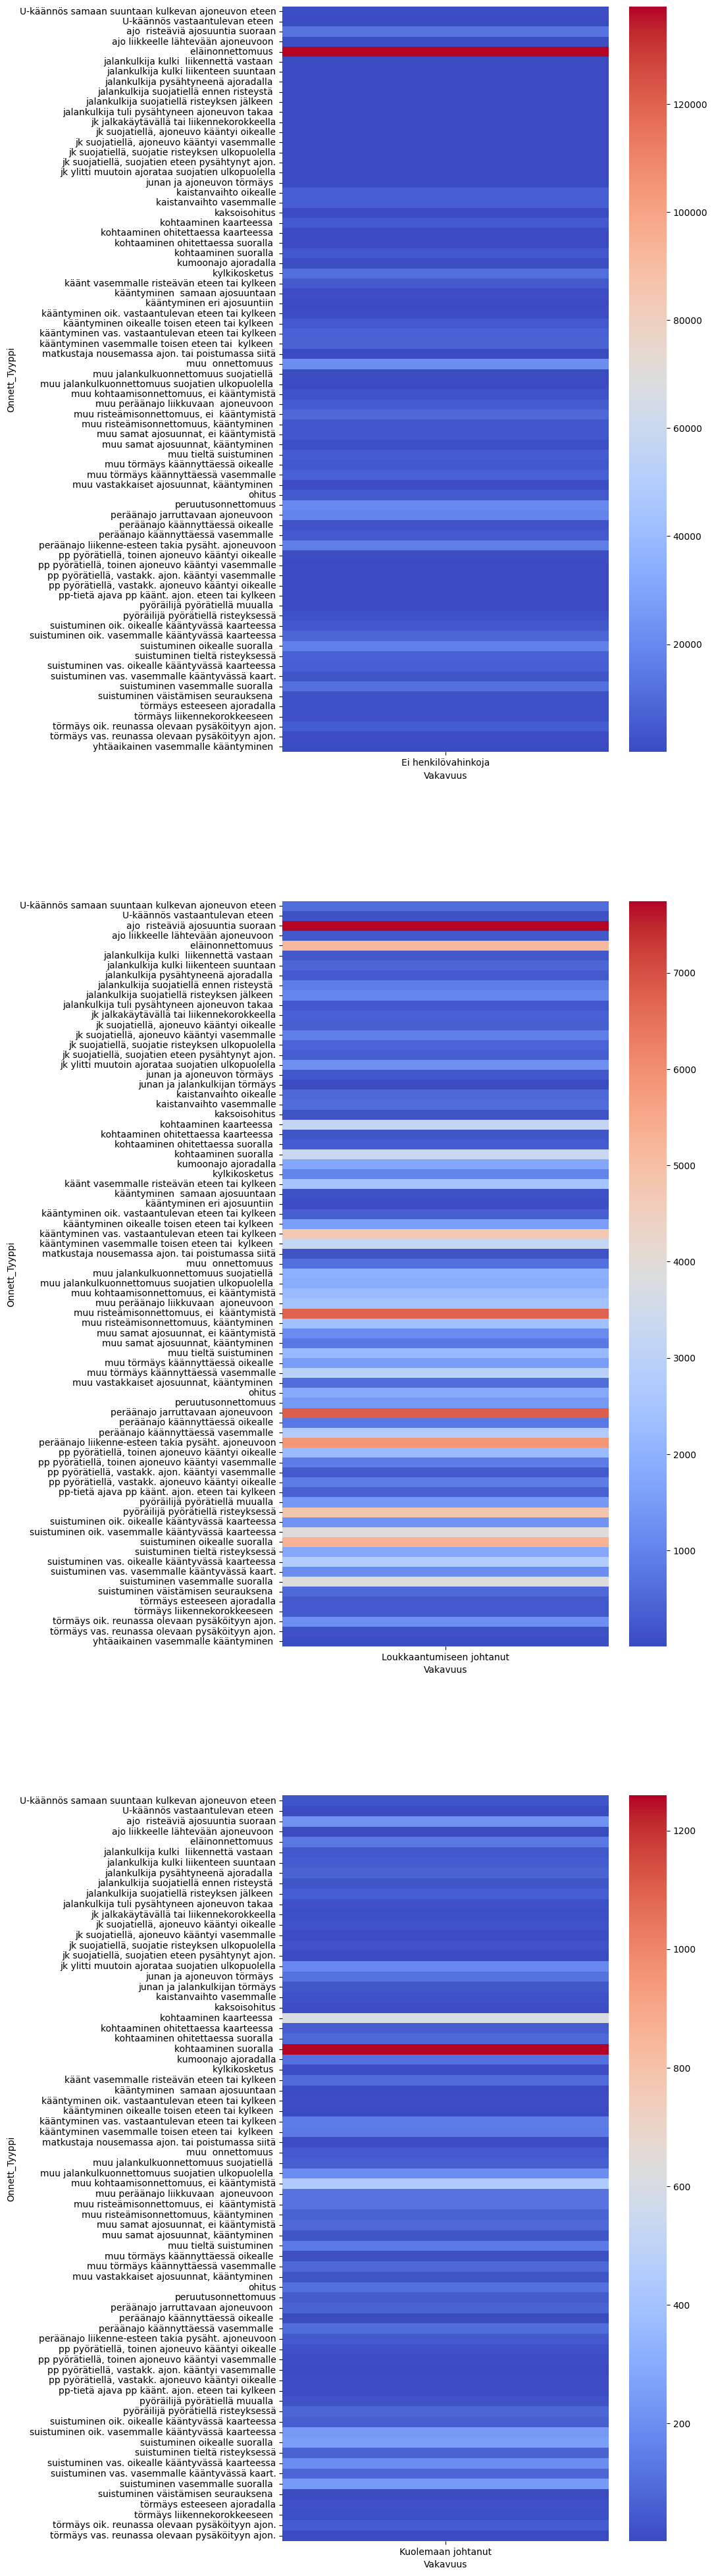

In [39]:
fig, ax = plt.subplots(figsize=(8,50))
plt.subplot(3,1,1)
ax=sns.heatmap(pd.crosstab(df_map1.Onnett_Tyyppi, df_map1.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(3,1,2)
ax=sns.heatmap(pd.crosstab(df_map2.Onnett_Tyyppi, df_map2.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(3,1,3)
ax=sns.heatmap(pd.crosstab(df_map3.Onnett_Tyyppi, df_map3.Vakavuus), annot=False, cmap="coolwarm")

plt.show()

#### Analysing

#### D.2. Osallisen laji depencies from Onnettomuusluokka, -tyyppi, Valoisuus and Talvihoitoluokka

In [40]:
df_det_map = df_det[['Osallisen_laji','Onnett_Luokka','Onnett_Tyyppi','Valoisuus','Talvihoitoluokka']].copy()
#df_det_map

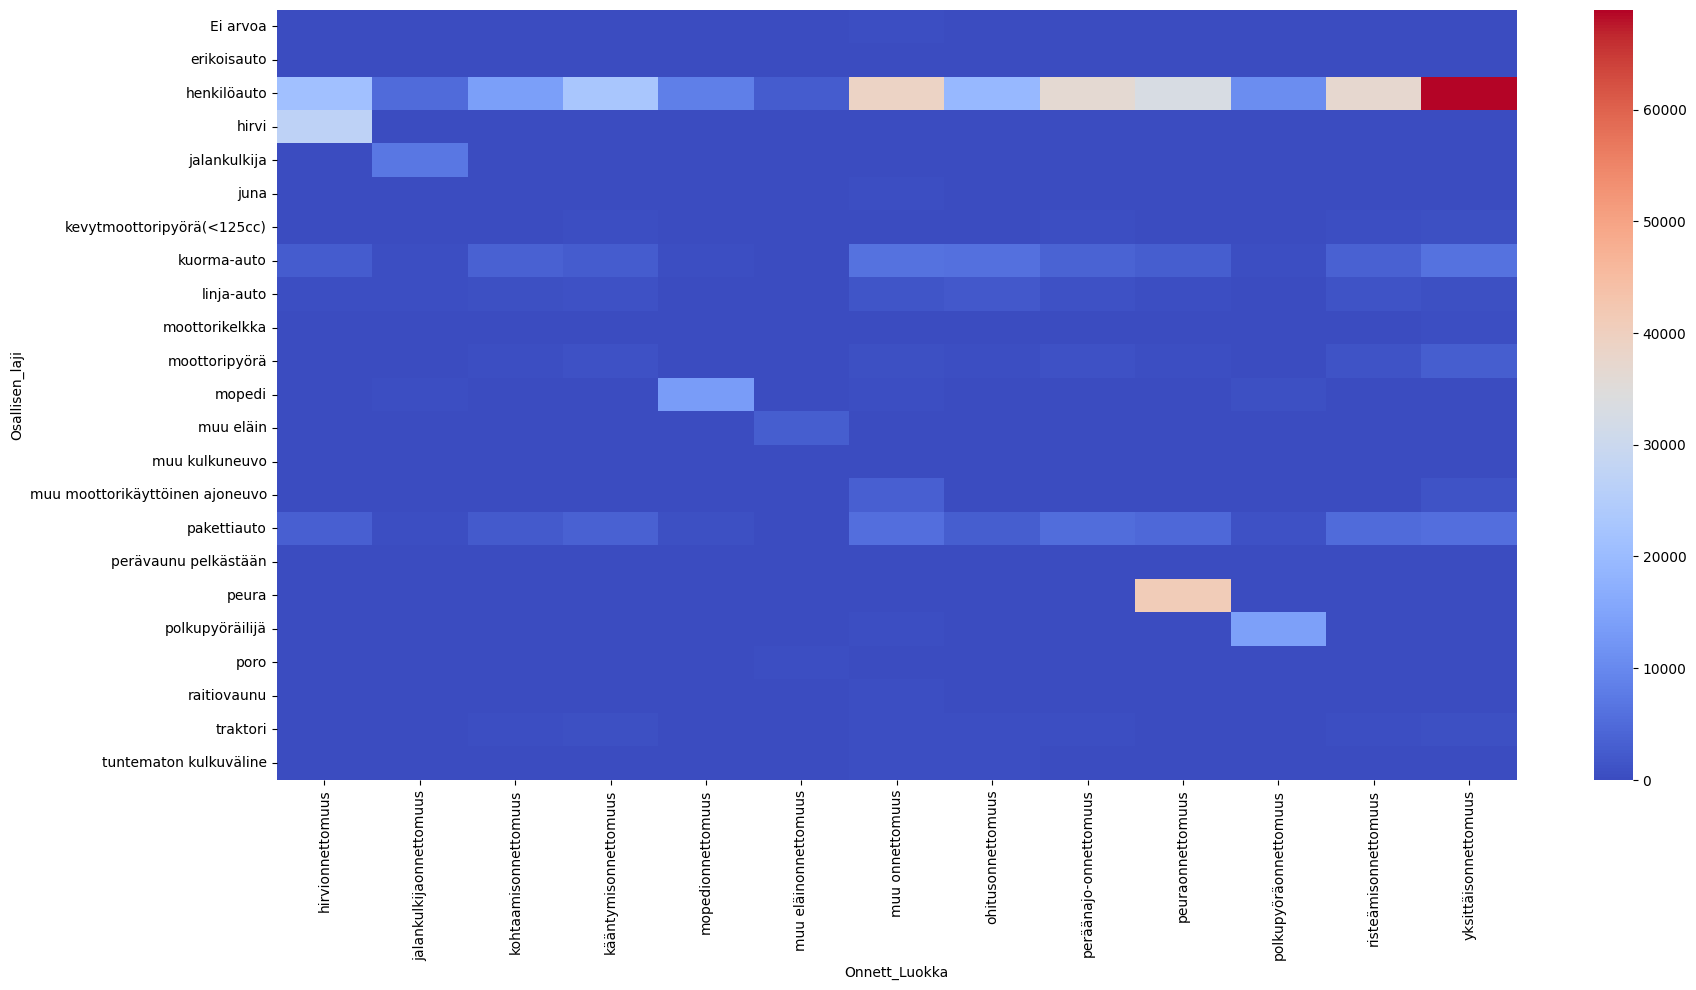

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(pd.crosstab(df_det_map.Osallisen_laji, df_det_map.Onnett_Luokka), annot=False, cmap="coolwarm")

plt.show()

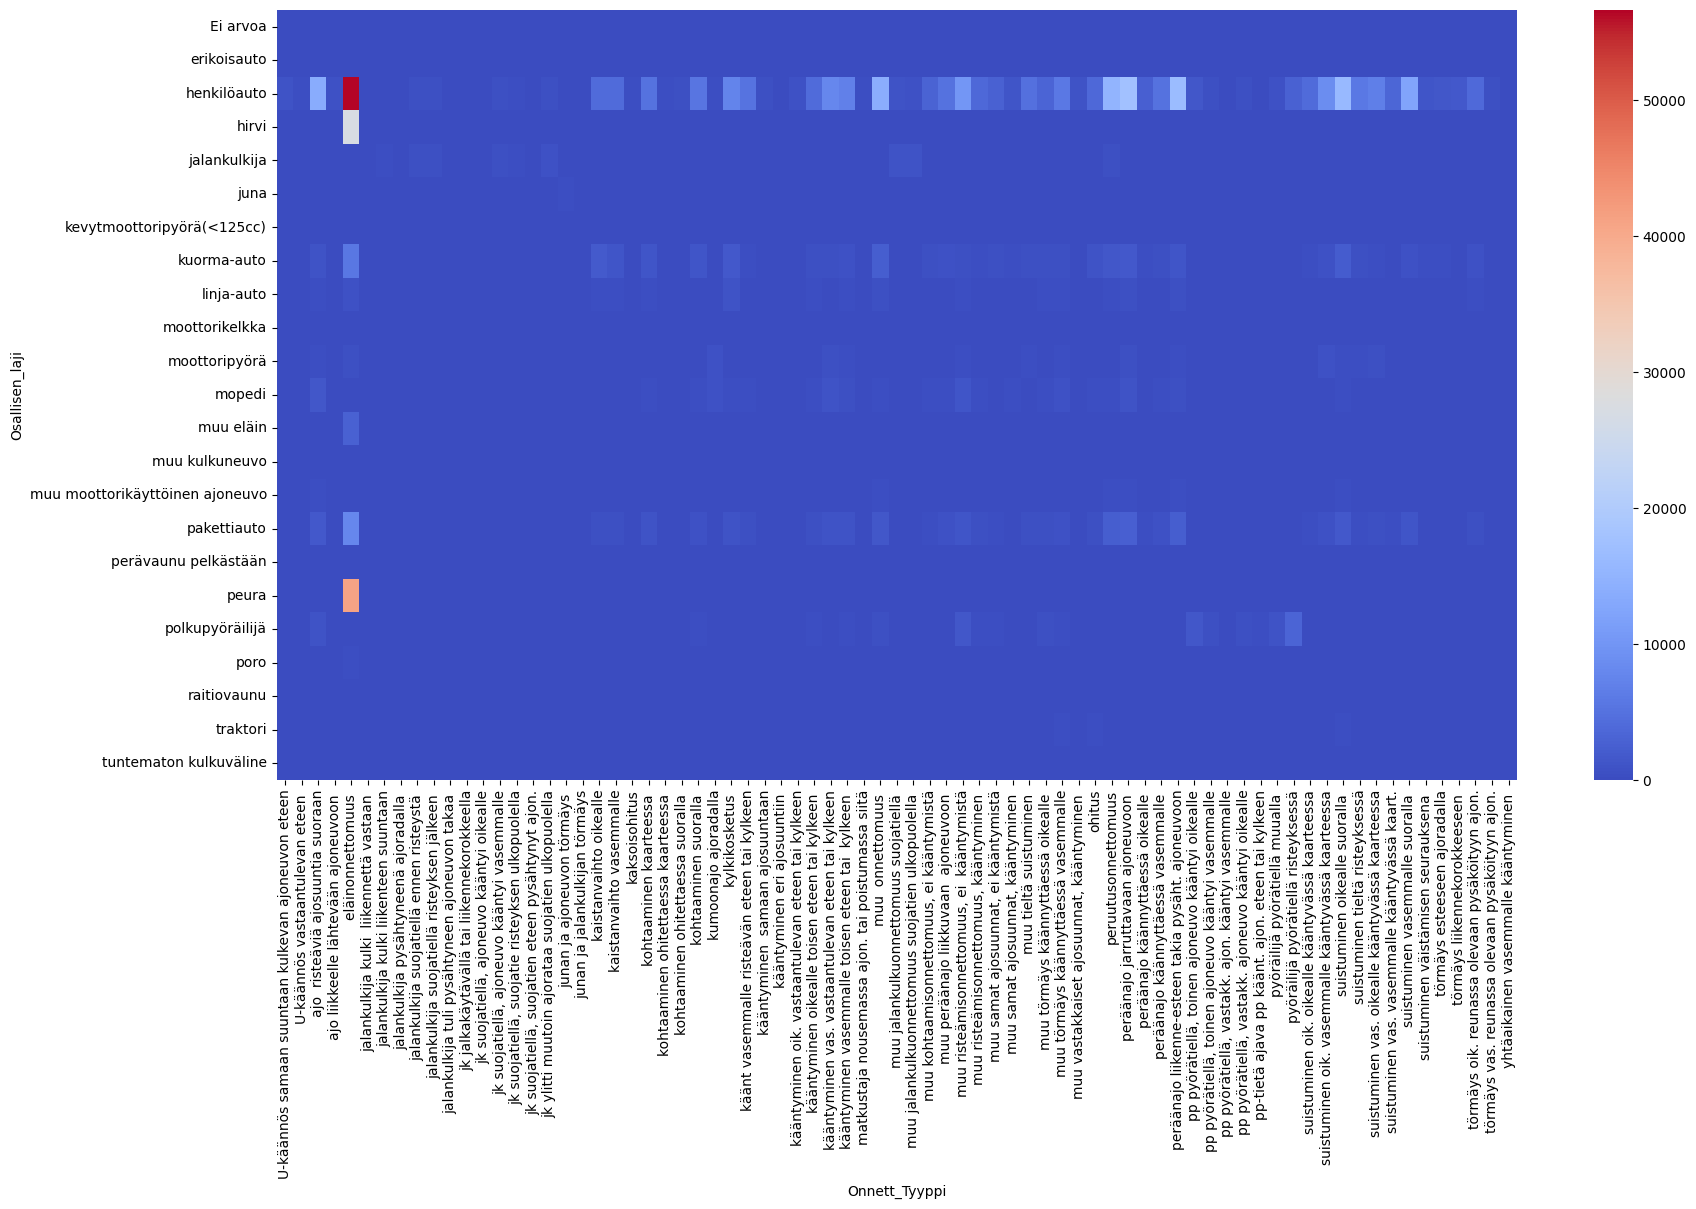

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(pd.crosstab(df_det_map.Osallisen_laji, df_det_map.Onnett_Tyyppi), annot=False, cmap="coolwarm")

plt.show()

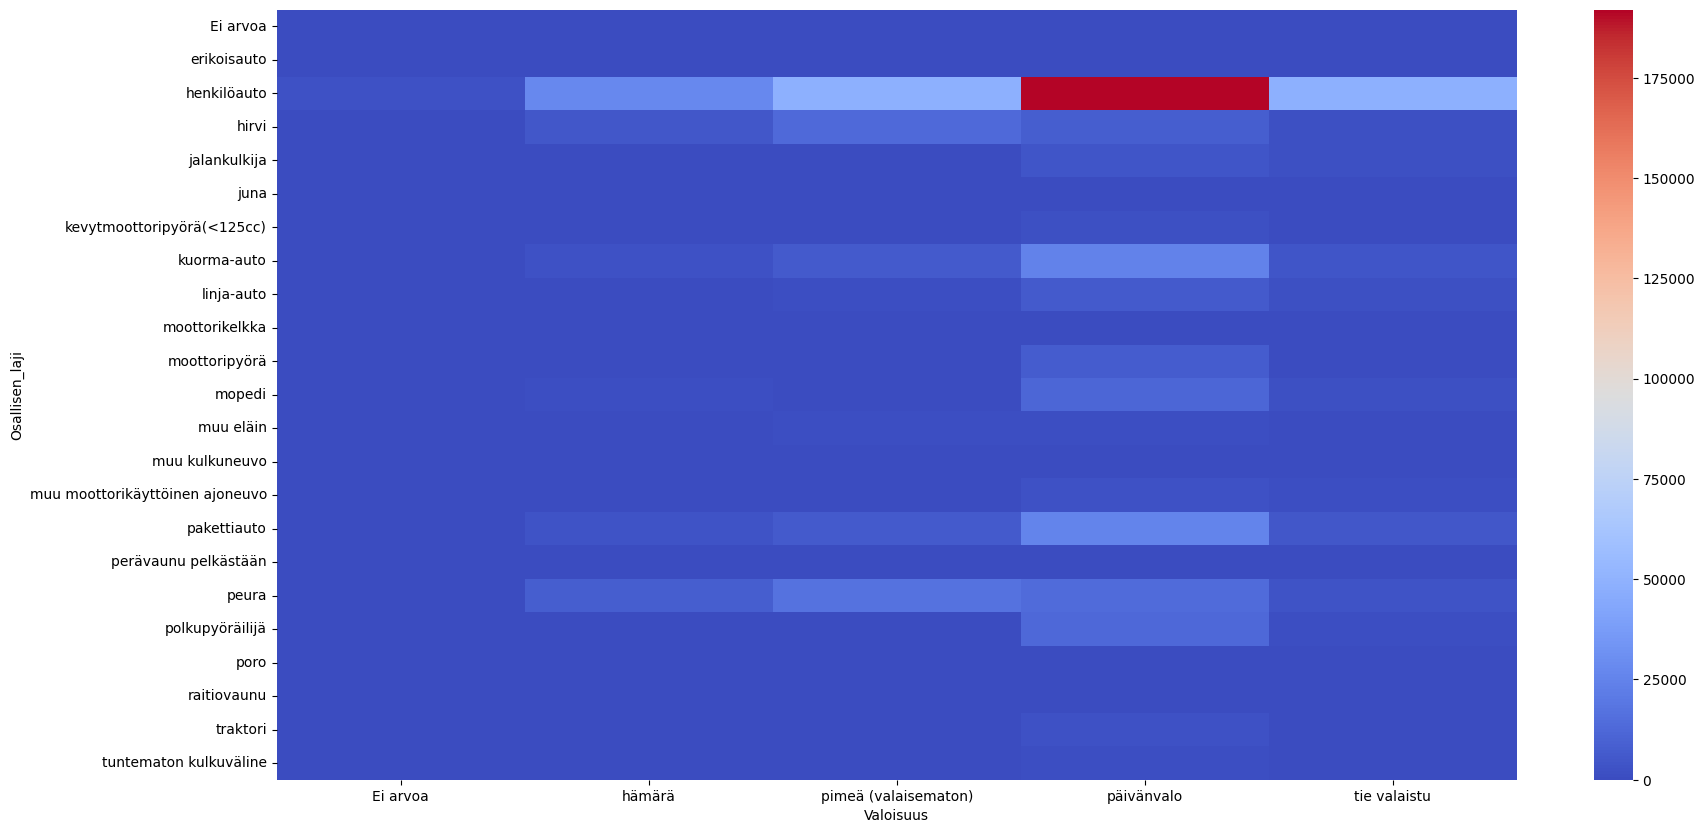

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(pd.crosstab(df_det_map.Osallisen_laji, df_det_map.Valoisuus), annot=False, cmap="coolwarm")

plt.show()

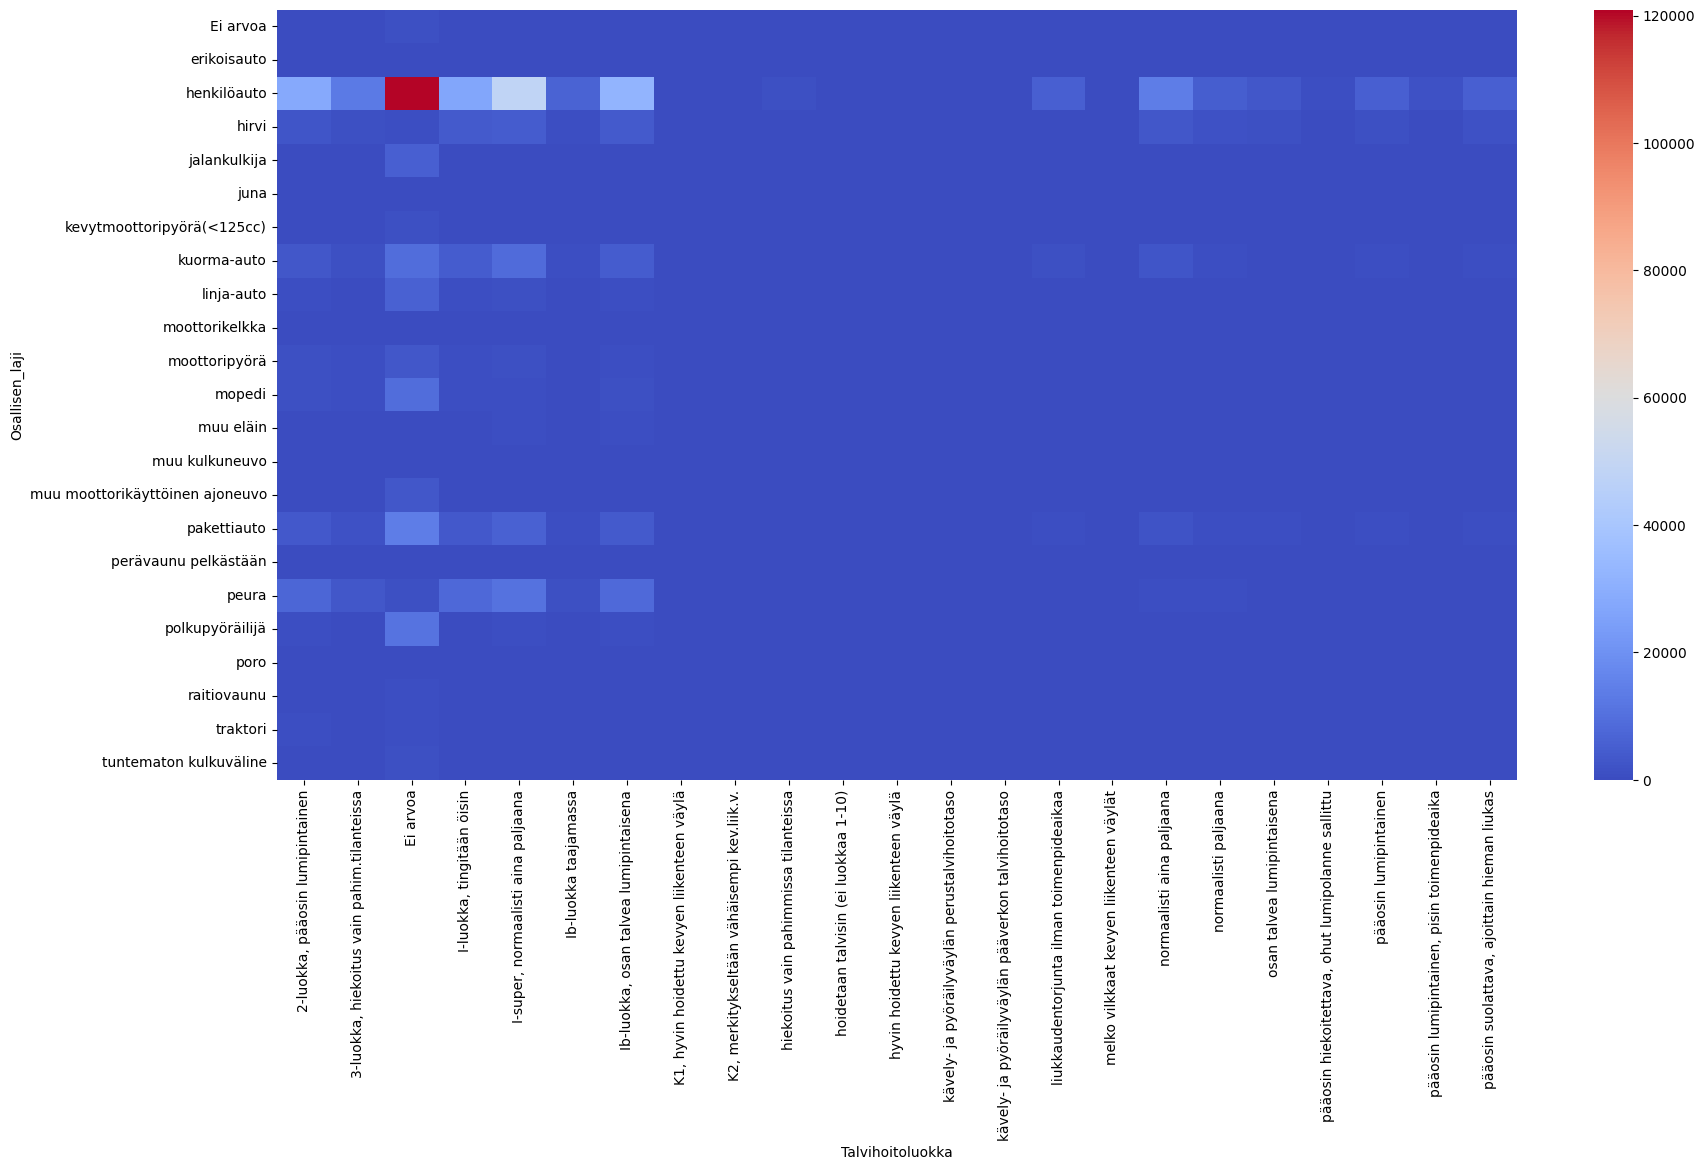

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(pd.crosstab(df_det_map.Osallisen_laji, df_det_map.Talvihoitoluokka), annot=False, cmap="coolwarm")

plt.show()

#### Analysing

#### D.3. Onnettomuusluokka depencies from Sää and Tienpinta

In [45]:
df_acc_map = df_det[['Onnett_Luokka','Sää','Tienpinta']].copy()
#df_acc_map

C:\Users\pasih\AppData\Local\Temp\ipykernel_10440\3402622733.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


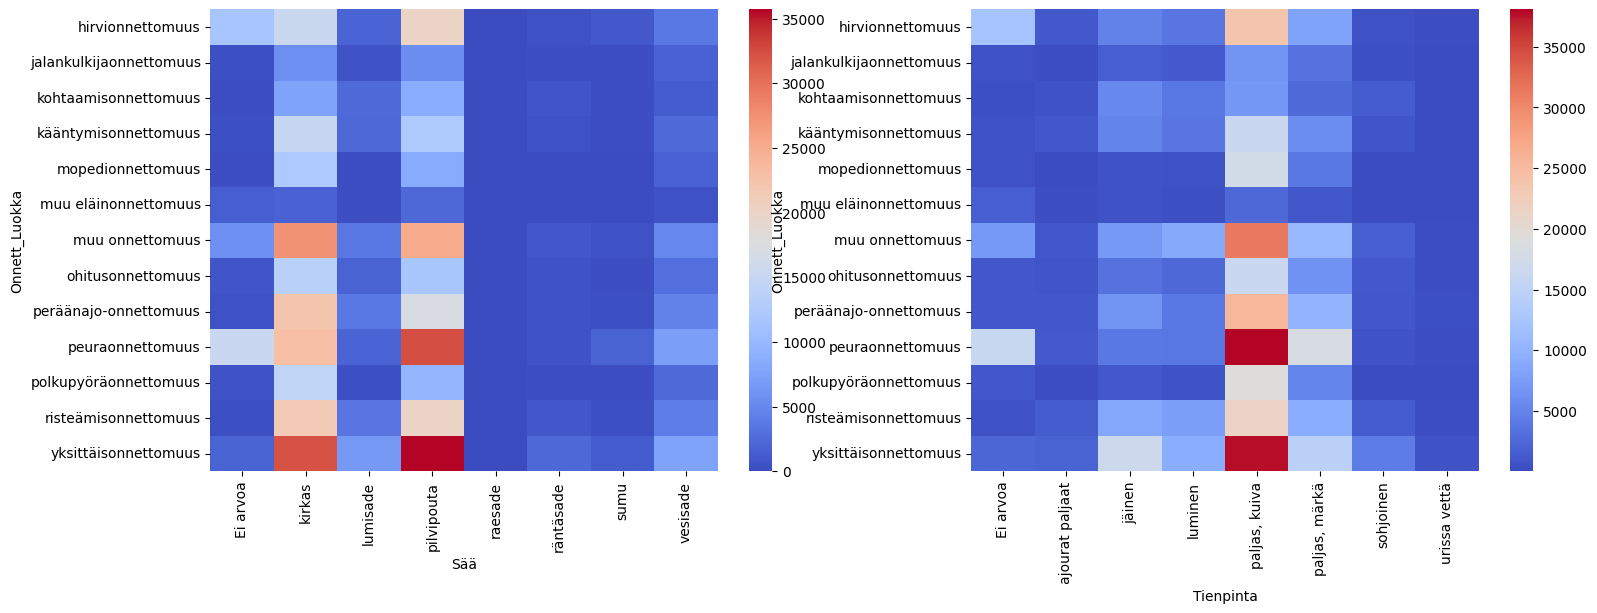

In [46]:
fig, ax = plt.subplots(figsize=(18,6))
plt.subplot(1,2,1)
ax=sns.heatmap(pd.crosstab(df_acc_map.Onnett_Luokka, df_acc_map.Sää), annot=False, cmap="coolwarm")

plt.subplot(1,2,2)
ax=sns.heatmap(pd.crosstab(df_acc_map.Onnett_Luokka, df_acc_map.Tienpinta), annot=False, cmap="coolwarm")

plt.show()

#### Analysing

#### D.4. Onnettomuustyyppi depencies from Valoisuus, Talvihoitoluokka/Nopeusrajoitus and Vuorokauden keskimääräiset liikennemäärät

In [47]:
df_act_map = df_det[['Onnett_Tyyppi','Valoisuus','Nopeusrajoitus','Vrk_keskim_lm','Vrk_keskim_raskas_lm']].copy()
#df_act_map

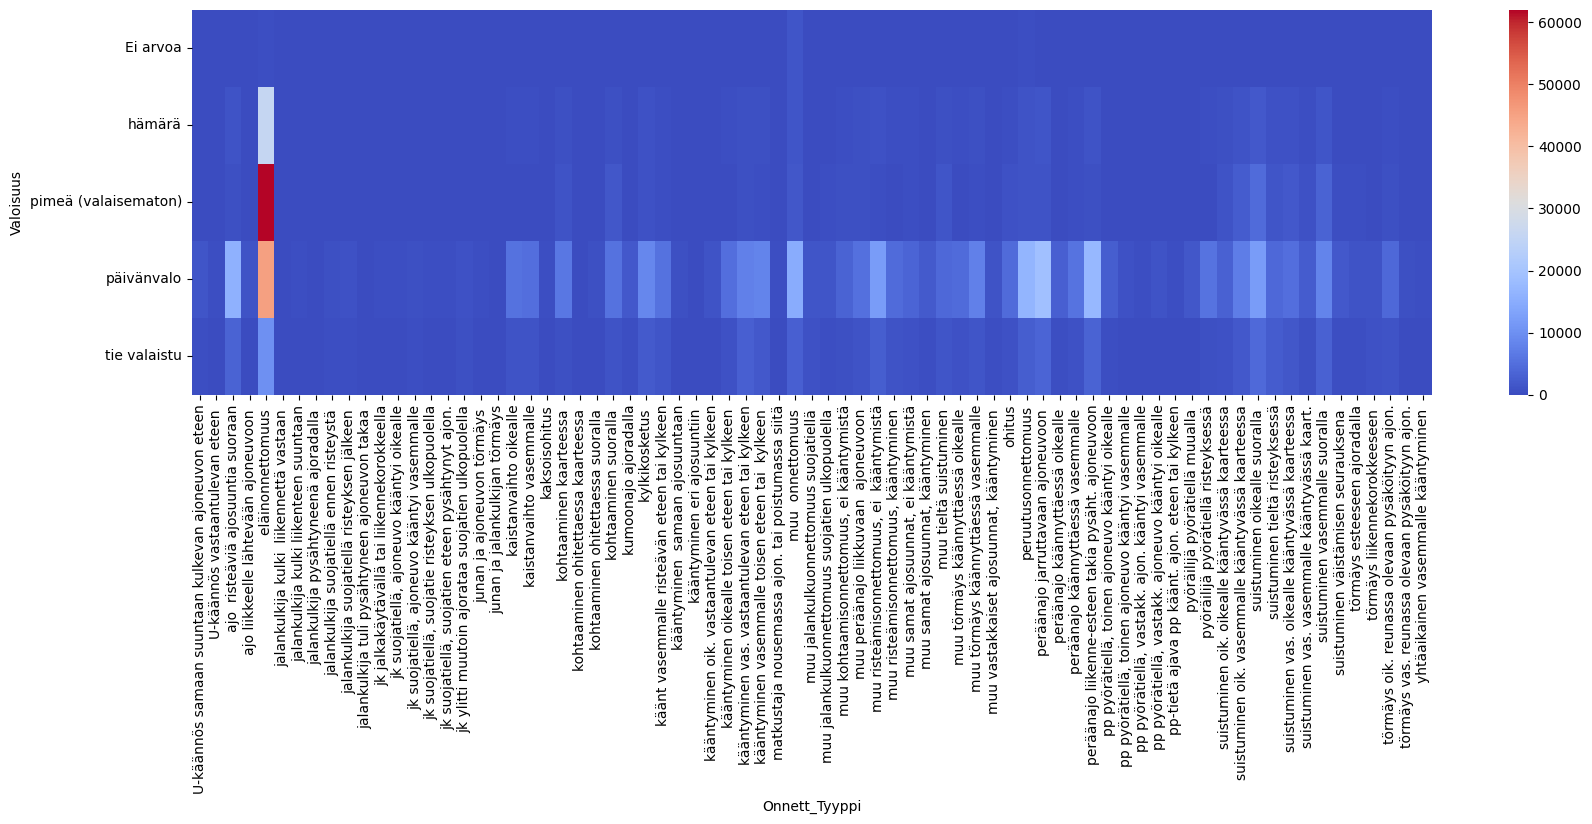

In [48]:
fig, ax = plt.subplots(figsize=(20,5))
ax=sns.heatmap(pd.crosstab(df_act_map.Valoisuus, df_act_map.Onnett_Tyyppi), annot=False, cmap="coolwarm")

plt.show()

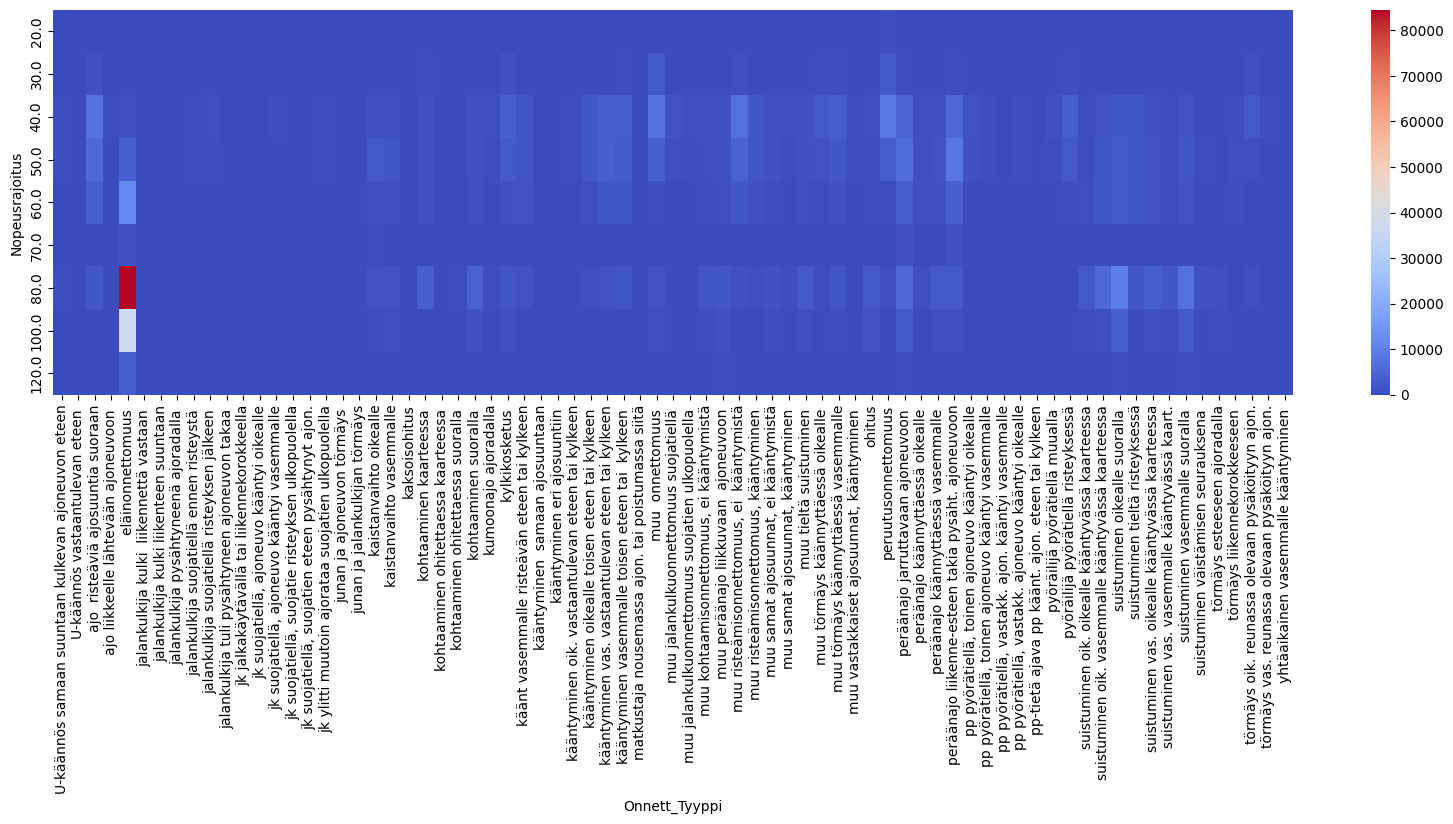

In [49]:
fig, ax = plt.subplots(figsize=(20,5))
ax=sns.heatmap(pd.crosstab(df_act_map.Nopeusrajoitus, df_act_map.Onnett_Tyyppi), annot=False, cmap="coolwarm")

plt.show()

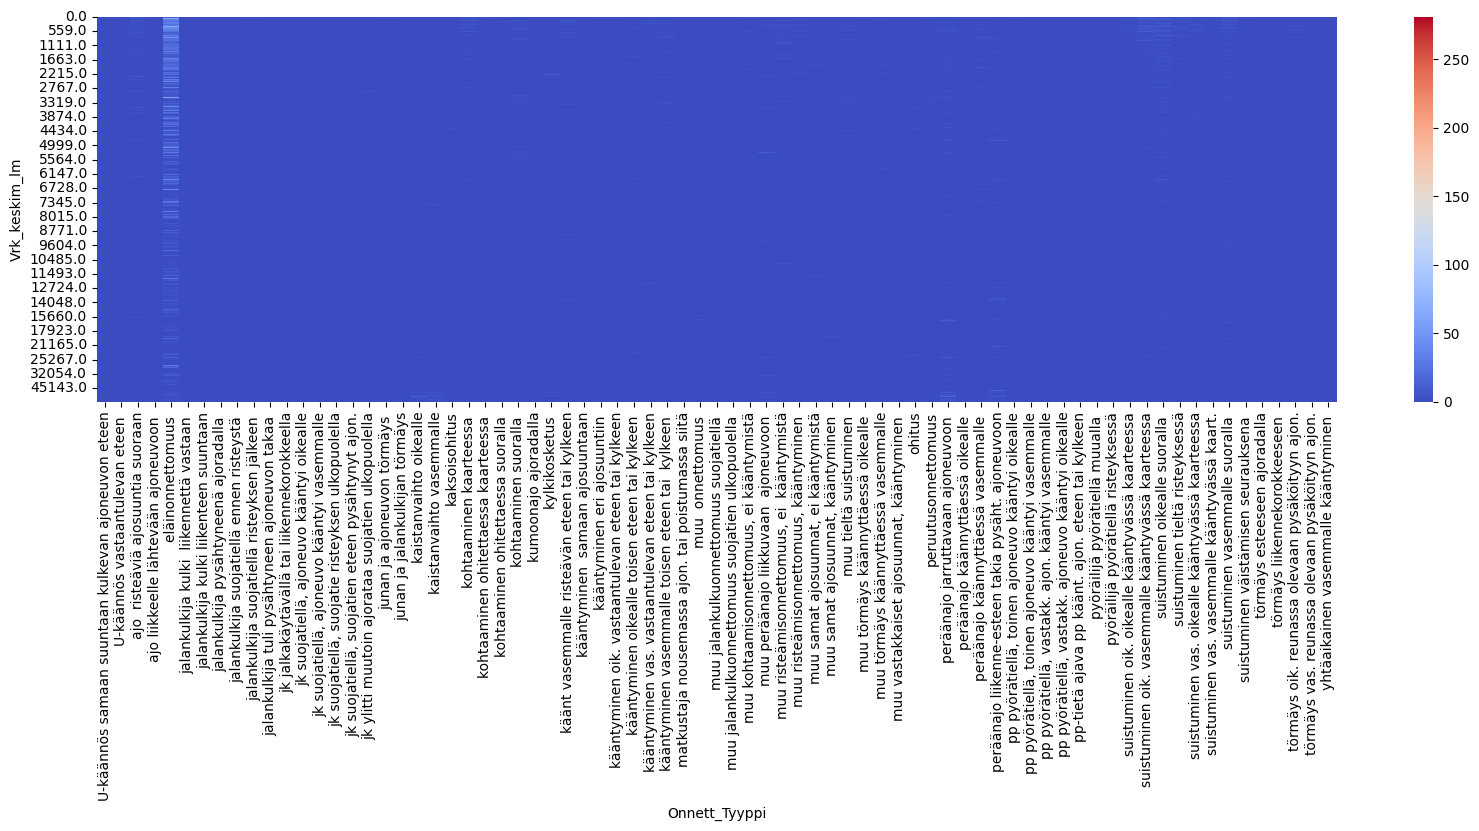

In [50]:
fig, ax = plt.subplots(figsize=(20,5))
ax=sns.heatmap(pd.crosstab(df_act_map.Vrk_keskim_lm, df_act_map.Onnett_Tyyppi), annot=False, cmap="coolwarm")

plt.show()

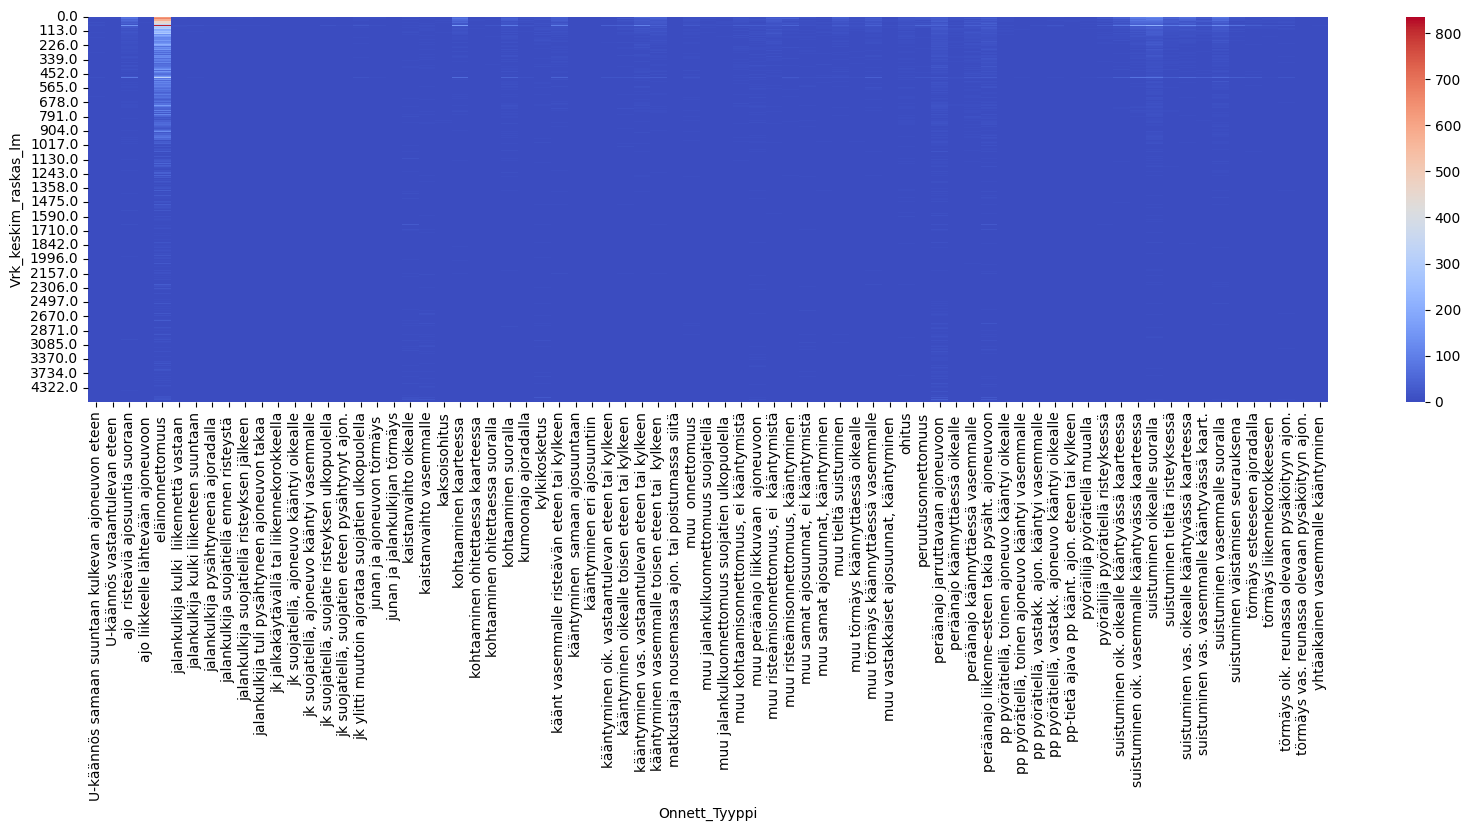

In [51]:
fig, ax = plt.subplots(figsize=(20,5))
ax=sns.heatmap(pd.crosstab(df_act_map.Vrk_keskim_raskas_lm, df_act_map.Onnett_Tyyppi), annot=False, cmap="coolwarm")

plt.show()

#### Analysing